# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [3]:
pip install pyautogui 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import shutil
import pyautogui

# 2. Keypoint using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic  #Holistic model
mp_drawing = mp.solutions.drawing_utils  #Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read live feed from webcam
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw Landmarks
        draw_landmarks(image, results)

        # Show on screen
        cv2.imshow("OpenCV-WebcamFeed", image)

        # Breaking loop to exit by pressing 'q' on keyboard
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

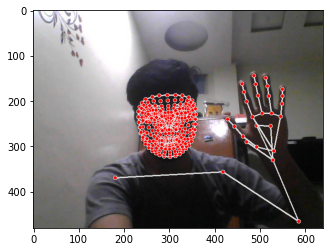

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.46910962,  0.54937047, -0.57406676, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.46910962,  0.54937047, -0.57406676, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['happy', 'sad', 'victory'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 10 frames in length
sequence_length = 15

# Folder start
start_folder = 0

In [25]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'happy': 0, 'sad': 1, 'victory': 2}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(45, 15, 1662)

In [32]:
np.array(labels).shape

(45,)

In [33]:
X = np.array(sequences)

In [34]:
X.shape

(45, 15, 1662)

In [35]:
y = to_categorical(labels).astype(int)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(3, 3)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 4s 848ms/step - loss: 1.2145 - categorical_accuracy: 0.3333
Epoch 2/2000
2/2 [==============================] - 0s 44ms/step - loss: 1.1093 - categorical_accuracy: 0.3333
Epoch 3/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1132 - categorical_accuracy: 0.3333
Epoch 4/2000
2/2 [==============================] - 0s 46ms/step - loss: 1.1037 - categorical_accuracy: 0.5238
Epoch 5/2000
2/2 [==============================] - 0s 43ms/step - loss: 1.1036 - categorical_accuracy: 0.3571
Epoch 6/2000
2/2 [==============================] - 0s 46ms/step - loss: 1.0881 - categorical_accuracy: 0.3333
Epoch 7/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.0762 - categorical_accuracy: 0.4524
Epoch 8/2000
2/2 [==============================] - 0s 44ms/step - loss: 1.1260 - categorical_accuracy: 0.3571
Epoch 9/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.0892 - categorical_accuracy: 0.3571


2/2 [==============================] - 0s 52ms/step - loss: 0.9540 - categorical_accuracy: 0.5238
Epoch 75/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.9176 - categorical_accuracy: 0.4524
Epoch 76/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.8735 - categorical_accuracy: 0.6429
Epoch 77/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.8315 - categorical_accuracy: 0.6429
Epoch 78/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.7676 - categorical_accuracy: 0.6190
Epoch 79/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.7312 - categorical_accuracy: 0.5714
Epoch 80/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.7123 - categorical_accuracy: 0.5714
Epoch 81/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.6886 - categorical_accuracy: 0.6429
Epoch 82/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.5707 - categorical_accuracy: 0.6905
Epoch 

2/2 [==============================] - 0s 47ms/step - loss: 0.5042 - categorical_accuracy: 0.6429
Epoch 147/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.5094 - categorical_accuracy: 0.6429
Epoch 148/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.4921 - categorical_accuracy: 0.6429
Epoch 149/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.4748 - categorical_accuracy: 0.7619
Epoch 150/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.4869 - categorical_accuracy: 0.6667
Epoch 151/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.4933 - categorical_accuracy: 0.6667
Epoch 152/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.4851 - categorical_accuracy: 0.6667
Epoch 153/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.4943 - categorical_accuracy: 0.6429
Epoch 154/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.4755 - categorical_accuracy: 0.690

2/2 [==============================] - 0s 39ms/step - loss: 0.7575 - categorical_accuracy: 0.6905
Epoch 219/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.6943 - categorical_accuracy: 0.6429
Epoch 220/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.6213 - categorical_accuracy: 0.6429
Epoch 221/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.5914 - categorical_accuracy: 0.6667
Epoch 222/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.5412 - categorical_accuracy: 0.6667
Epoch 223/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.5054 - categorical_accuracy: 0.6905
Epoch 224/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.4860 - categorical_accuracy: 0.8095
Epoch 225/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.4726 - categorical_accuracy: 0.7857
Epoch 226/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.4630 - categorical_accuracy: 0.714

2/2 [==============================] - 0s 37ms/step - loss: 0.2863 - categorical_accuracy: 0.9048
Epoch 291/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.2559 - categorical_accuracy: 0.9048
Epoch 292/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.3980 - categorical_accuracy: 0.8095
Epoch 293/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.2781 - categorical_accuracy: 0.9048
Epoch 294/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.2853 - categorical_accuracy: 0.9048
Epoch 295/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.2502 - categorical_accuracy: 0.8810
Epoch 296/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.2680 - categorical_accuracy: 0.9286
Epoch 297/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.2307 - categorical_accuracy: 0.9048
Epoch 298/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.2536 - categorical_accuracy: 0.881

2/2 [==============================] - 0s 42ms/step - loss: 0.1974 - categorical_accuracy: 0.9048
Epoch 363/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.3618 - categorical_accuracy: 0.8095
Epoch 364/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.2632 - categorical_accuracy: 0.8571
Epoch 365/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.3517 - categorical_accuracy: 0.8333
Epoch 366/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.2191 - categorical_accuracy: 0.9524
Epoch 367/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.2549 - categorical_accuracy: 0.8810
Epoch 368/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.3214 - categorical_accuracy: 0.8810
Epoch 369/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.1832 - categorical_accuracy: 0.9524
Epoch 370/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.4238 - categorical_accuracy: 0.761

2/2 [==============================] - 0s 43ms/step - loss: 0.0185 - categorical_accuracy: 1.0000
Epoch 435/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0451 - categorical_accuracy: 0.9762
Epoch 436/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.0168 - categorical_accuracy: 1.0000
Epoch 437/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0609 - categorical_accuracy: 0.9762
Epoch 438/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0236 - categorical_accuracy: 1.0000
Epoch 439/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0241 - categorical_accuracy: 1.0000
Epoch 440/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 441/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0435 - categorical_accuracy: 0.9762
Epoch 442/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0085 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 43ms/step - loss: 5.1698e-05 - categorical_accuracy: 1.0000
Epoch 506/2000
2/2 [==============================] - 0s 38ms/step - loss: 4.9791e-05 - categorical_accuracy: 1.0000
Epoch 507/2000
2/2 [==============================] - 0s 39ms/step - loss: 4.2862e-05 - categorical_accuracy: 1.0000
Epoch 508/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.1427e-05 - categorical_accuracy: 1.0000
Epoch 509/2000
2/2 [==============================] - 0s 38ms/step - loss: 2.7407e-05 - categorical_accuracy: 1.0000
Epoch 510/2000
2/2 [==============================] - 0s 45ms/step - loss: 1.9872e-05 - categorical_accuracy: 1.0000
Epoch 511/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.8724e-05 - categorical_accuracy: 1.0000
Epoch 512/2000
2/2 [==============================] - 0s 38ms/step - loss: 2.2510e-05 - categorical_accuracy: 1.0000
Epoch 513/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.11

2/2 [==============================] - 0s 40ms/step - loss: 2.1684e-06 - categorical_accuracy: 1.0000
Epoch 576/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.1372e-06 - categorical_accuracy: 1.0000
Epoch 577/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.0946e-06 - categorical_accuracy: 1.0000
Epoch 578/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.0662e-06 - categorical_accuracy: 1.0000
Epoch 579/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.0322e-06 - categorical_accuracy: 1.0000
Epoch 580/2000
2/2 [==============================] - 0s 37ms/step - loss: 1.9925e-06 - categorical_accuracy: 1.0000
Epoch 581/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.9470e-06 - categorical_accuracy: 1.0000
Epoch 582/2000
2/2 [==============================] - 0s 37ms/step - loss: 1.9243e-06 - categorical_accuracy: 1.0000
Epoch 583/2000
2/2 [==============================] - 0s 37ms/step - loss: 1.87

2/2 [==============================] - 0s 43ms/step - loss: 8.0891e-07 - categorical_accuracy: 1.0000
Epoch 646/2000
2/2 [==============================] - 0s 38ms/step - loss: 7.9756e-07 - categorical_accuracy: 1.0000
Epoch 647/2000
2/2 [==============================] - 0s 42ms/step - loss: 7.8337e-07 - categorical_accuracy: 1.0000
Epoch 648/2000
2/2 [==============================] - 0s 42ms/step - loss: 7.7769e-07 - categorical_accuracy: 1.0000
Epoch 649/2000
2/2 [==============================] - 0s 38ms/step - loss: 7.6350e-07 - categorical_accuracy: 1.0000
Epoch 650/2000
2/2 [==============================] - 0s 38ms/step - loss: 7.5499e-07 - categorical_accuracy: 1.0000
Epoch 651/2000
2/2 [==============================] - 0s 36ms/step - loss: 7.4363e-07 - categorical_accuracy: 1.0000
Epoch 652/2000
2/2 [==============================] - 0s 41ms/step - loss: 7.4079e-07 - categorical_accuracy: 1.0000
Epoch 653/2000
2/2 [==============================] - 0s 40ms/step - loss: 7.35

2/2 [==============================] - 0s 36ms/step - loss: 4.5129e-07 - categorical_accuracy: 1.0000
Epoch 716/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.4845e-07 - categorical_accuracy: 1.0000
Epoch 717/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.4278e-07 - categorical_accuracy: 1.0000
Epoch 718/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.4278e-07 - categorical_accuracy: 1.0000
Epoch 719/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.3710e-07 - categorical_accuracy: 1.0000
Epoch 720/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.3994e-07 - categorical_accuracy: 1.0000
Epoch 721/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.3426e-07 - categorical_accuracy: 1.0000
Epoch 722/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.2858e-07 - categorical_accuracy: 1.0000
Epoch 723/2000
2/2 [==============================] - 0s 35ms/step - loss: 4.28

2/2 [==============================] - 0s 35ms/step - loss: 2.9802e-07 - categorical_accuracy: 1.0000
Epoch 786/2000
2/2 [==============================] - 0s 38ms/step - loss: 2.9518e-07 - categorical_accuracy: 1.0000
Epoch 787/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.9518e-07 - categorical_accuracy: 1.0000
Epoch 788/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.9235e-07 - categorical_accuracy: 1.0000
Epoch 789/2000
2/2 [==============================] - 0s 36ms/step - loss: 2.9235e-07 - categorical_accuracy: 1.0000
Epoch 790/2000
2/2 [==============================] - 0s 38ms/step - loss: 2.8667e-07 - categorical_accuracy: 1.0000
Epoch 791/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.8667e-07 - categorical_accuracy: 1.0000
Epoch 792/2000
2/2 [==============================] - 0s 44ms/step - loss: 2.8383e-07 - categorical_accuracy: 1.0000
Epoch 793/2000
2/2 [==============================] - 0s 61ms/step - loss: 2.86

2/2 [==============================] - 0s 39ms/step - loss: 2.1287e-07 - categorical_accuracy: 1.0000
Epoch 856/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.1287e-07 - categorical_accuracy: 1.0000
Epoch 857/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.1003e-07 - categorical_accuracy: 1.0000
Epoch 858/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.1003e-07 - categorical_accuracy: 1.0000
Epoch 859/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.1003e-07 - categorical_accuracy: 1.0000
Epoch 860/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.1003e-07 - categorical_accuracy: 1.0000
Epoch 861/2000
2/2 [==============================] - 0s 41ms/step - loss: 2.0720e-07 - categorical_accuracy: 1.0000
Epoch 862/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.1003e-07 - categorical_accuracy: 1.0000
Epoch 863/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.10

2/2 [==============================] - 0s 39ms/step - loss: 1.5611e-07 - categorical_accuracy: 1.0000
Epoch 926/2000
2/2 [==============================] - 0s 43ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 927/2000
2/2 [==============================] - 0s 38ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 928/2000
2/2 [==============================] - 0s 37ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 929/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 930/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 931/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 932/2000
2/2 [==============================] - 0s 45ms/step - loss: 1.5327e-07 - categorical_accuracy: 1.0000
Epoch 933/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.53

2/2 [==============================] - 0s 42ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 996/2000
2/2 [==============================] - 0s 70ms/step - loss: 1.2205e-07 - categorical_accuracy: 1.0000
Epoch 997/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 998/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 999/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.2205e-07 - categorical_accuracy: 1.0000
Epoch 1000/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.2205e-07 - categorical_accuracy: 1.0000
Epoch 1001/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.2205e-07 - categorical_accuracy: 1.0000
Epoch 1002/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.2205e-07 - categorical_accuracy: 1.0000
Epoch 1003/2000
2/2 [==============================] - 0s 41ms/step - loss: 

2/2 [==============================] - 0s 41ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1065/2000
2/2 [==============================] - 0s 39ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1066/2000
2/2 [==============================] - 0s 40ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1067/2000
2/2 [==============================] - 0s 39ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1068/2000
2/2 [==============================] - 0s 36ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1069/2000
2/2 [==============================] - 0s 36ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1070/2000
2/2 [==============================] - 0s 35ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1071/2000
2/2 [==============================] - 0s 36ms/step - loss: 9.3664e-08 - categorical_accuracy: 1.0000
Epoch 1072/2000
2/2 [==============================] - 0s 37ms/step - lo

2/2 [==============================] - 0s 40ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1134/2000
2/2 [==============================] - 0s 39ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1135/2000
2/2 [==============================] - 0s 40ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1136/2000
2/2 [==============================] - 0s 39ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1137/2000
2/2 [==============================] - 0s 40ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1138/2000
2/2 [==============================] - 0s 41ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1139/2000
2/2 [==============================] - 0s 41ms/step - loss: 7.0958e-08 - categorical_accuracy: 1.0000
Epoch 1140/2000
2/2 [==============================] - 0s 38ms/step - loss: 6.8120e-08 - categorical_accuracy: 1.0000
Epoch 1141/2000
2/2 [==============================] - 0s 41ms/step - lo

2/2 [==============================] - 0s 40ms/step - loss: 6.2443e-08 - categorical_accuracy: 1.0000
Epoch 1203/2000
2/2 [==============================] - 0s 42ms/step - loss: 6.2443e-08 - categorical_accuracy: 1.0000
Epoch 1204/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1205/2000
2/2 [==============================] - 0s 39ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1206/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1207/2000
2/2 [==============================] - 0s 39ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1208/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1209/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.9605e-08 - categorical_accuracy: 1.0000
Epoch 1210/2000
2/2 [==============================] - 0s 41ms/step - lo

2/2 [==============================] - 0s 41ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1272/2000
2/2 [==============================] - 0s 41ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1273/2000
2/2 [==============================] - 0s 43ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1274/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1275/2000
2/2 [==============================] - 0s 43ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1276/2000
2/2 [==============================] - 0s 43ms/step - loss: 5.3928e-08 - categorical_accuracy: 1.0000
Epoch 1277/2000
2/2 [==============================] - 0s 41ms/step - loss: 5.1090e-08 - categorical_accuracy: 1.0000
Epoch 1278/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.1090e-08 - categorical_accuracy: 1.0000
Epoch 1279/2000
2/2 [==============================] - 0s 42ms/step - lo

2/2 [==============================] - 0s 37ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1341/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1342/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1343/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1344/2000
2/2 [==============================] - 0s 37ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1345/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1346/2000
2/2 [==============================] - 0s 40ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1347/2000
2/2 [==============================] - 0s 38ms/step - loss: 4.5413e-08 - categorical_accuracy: 1.0000
Epoch 1348/2000
2/2 [==============================] - 0s 42ms/step - lo

2/2 [==============================] - 0s 40ms/step - loss: 3.9736e-08 - categorical_accuracy: 1.0000
Epoch 1410/2000
2/2 [==============================] - 0s 43ms/step - loss: 3.9736e-08 - categorical_accuracy: 1.0000
Epoch 1411/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.9736e-08 - categorical_accuracy: 1.0000
Epoch 1412/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.9736e-08 - categorical_accuracy: 1.0000
Epoch 1413/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.9736e-08 - categorical_accuracy: 1.0000
Epoch 1414/2000
2/2 [==============================] - 0s 42ms/step - loss: 4.2575e-08 - categorical_accuracy: 1.0000
Epoch 1415/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.2575e-08 - categorical_accuracy: 1.0000
Epoch 1416/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.6898e-08 - categorical_accuracy: 1.0000
Epoch 1417/2000
2/2 [==============================] - 0s 42ms/step - lo

2/2 [==============================] - 0s 38ms/step - loss: 3.4060e-08 - categorical_accuracy: 1.0000
Epoch 1479/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.4060e-08 - categorical_accuracy: 1.0000
Epoch 1480/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1481/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1482/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1483/2000
2/2 [==============================] - 0s 44ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1484/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1485/2000
2/2 [==============================] - 0s 37ms/step - loss: 3.1221e-08 - categorical_accuracy: 1.0000
Epoch 1486/2000
2/2 [==============================] - 0s 38ms/step - lo

2/2 [==============================] - 0s 41ms/step - loss: 2.8383e-08 - categorical_accuracy: 1.0000
Epoch 1548/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.5545e-08 - categorical_accuracy: 1.0000
Epoch 1549/2000
2/2 [==============================] - 0s 37ms/step - loss: 2.5545e-08 - categorical_accuracy: 1.0000
Epoch 1550/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.5545e-08 - categorical_accuracy: 1.0000
Epoch 1551/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.5545e-08 - categorical_accuracy: 1.0000
Epoch 1552/2000
2/2 [==============================] - 0s 42ms/step - loss: 2.5545e-08 - categorical_accuracy: 1.0000
Epoch 1553/2000
2/2 [==============================] - 0s 39ms/step - loss: 2.8383e-08 - categorical_accuracy: 1.0000
Epoch 1554/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.8383e-08 - categorical_accuracy: 1.0000
Epoch 1555/2000
2/2 [==============================] - 0s 39ms/step - lo

2/2 [==============================] - 0s 42ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1617/2000
2/2 [==============================] - 0s 46ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1618/2000
2/2 [==============================] - 0s 38ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1619/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1620/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1621/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1622/2000
2/2 [==============================] - 0s 41ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1623/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.2707e-08 - categorical_accuracy: 1.0000
Epoch 1624/2000
2/2 [==============================] - 0s 39ms/step - lo

2/2 [==============================] - 0s 40ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1686/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1687/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1688/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1689/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1690/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1691/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1692/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.9868e-08 - categorical_accuracy: 1.0000
Epoch 1693/2000
2/2 [==============================] - 0s 41ms/step - lo

2/2 [==============================] - 0s 43ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1755/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1756/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1757/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1758/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1759/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1760/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1761/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 1762/2000
2/2 [==============================] - 0s 39ms/step - lo

2/2 [==============================] - 0s 40ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1824/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.4192e-08 - categorical_accuracy: 1.0000
Epoch 1825/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.4192e-08 - categorical_accuracy: 1.0000
Epoch 1826/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1827/2000
2/2 [==============================] - 0s 42ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1828/2000
2/2 [==============================] - 0s 38ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1829/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1830/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1831/2000
2/2 [==============================] - 0s 42ms/step - lo

2/2 [==============================] - 0s 41ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1893/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1894/2000
2/2 [==============================] - 0s 40ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1895/2000
2/2 [==============================] - 0s 41ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1896/2000
2/2 [==============================] - 0s 49ms/step - loss: 1.4192e-08 - categorical_accuracy: 1.0000
Epoch 1897/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1898/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1899/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1900/2000
2/2 [==============================] - 0s 40ms/step - lo

2/2 [==============================] - 0s 78ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1962/2000
2/2 [==============================] - 0s 75ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1963/2000
2/2 [==============================] - 0s 59ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1964/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.1353e-08 - categorical_accuracy: 1.0000
Epoch 1965/2000
2/2 [==============================] - 0s 64ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1966/2000
2/2 [==============================] - 0s 61ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1967/2000
2/2 [==============================] - 0s 82ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1968/2000
2/2 [==============================] - 0s 60ms/step - loss: 8.5149e-09 - categorical_accuracy: 1.0000
Epoch 1969/2000
2/2 [==============================] - 0s 58ms/step - lo

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________


# 8. Make Predictions

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[0])]

'sad'

In [46]:
actions[np.argmax(y_test[0])] 

'sad'

# 9. Save Weights

In [47]:
model.save('make_predict.h5')

In [48]:
model.load_weights('make_predict.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [1, 1]],

       [[1, 1],
        [0, 1]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.6666666666666666

# 11. Test in Real Time

In [54]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [58]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-15:]
        
        if len(sequence) == 15:
            #cv2.waitKey(500)
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
                
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-15:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        print(sentence[-1:])
            
        #Take action or perform tasks
        if(sentence[-1:]==["victory"]):
            pyautogui.hotkey('ctrl', 'shift', 'esc')
            
        if(sentence[-1:]==["sad"]):
            print("IN")
            pyautogui.hotkey('alt', 'e', 'f', 'x')
#             pyautogui.hotkey('alt', 'f')
#             pyautogui.hotkey('x')
                
        elif(sentence[-1:]==["happy"]):
            pyautogui.hotkey('alt', 'f4')
        else:
            pass
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['victory']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']
['happy']


FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.